This notebook contains the autocorrelation analysis for the household_power_consumption dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions #Contains built functions for the project
from statsmodels.graphics.tsaplots import plot_acf

Here we read and preprocess the dataset.

In [3]:
path = "household_power_consumption.txt"
df = functions.load_data(path)

#Preprocess dataset and convert to hourly
df_hourly = functions.preprocess_data(df).reset_index()

In [4]:
df_hourly

,datetime,Global_active_power,Global_reactive_power,Global_intensity,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-17 00:00:00,1.882467,0.102433,8.126667,240.961833,0.0,0.466667,0.000000
1,2006-12-17 01:00:00,3.349400,0.136933,14.246667,240.448333,0.0,25.233333,0.000000
2,2006-12-17 02:00:00,1.587267,0.078233,6.870000,245.818667,0.0,0.566667,0.000000
3,2006-12-17 03:00:00,1.662200,0.079533,7.206667,244.513500,0.0,0.766667,0.000000
4,2006-12-17 04:00:00,2.215767,0.093467,9.333333,243.855500,0.0,0.566667,8.883333
...,...,...,...,...,...,...,...,...
34555,2010-11-25 19:00:00,2.330467,0.151567,9.800000,237.729667,0.0,0.666667,8.366667
34556,2010-11-25 20:00:00,1.647833,0.098033,6.826667,241.659000,0.0,0.550000,0.000000
34557,2010-11-25 21:00:00,1.342933,0.049433,5.540000,240.698833,0.0,0.000000,0.000000
34558,2010-11-25 22:00:00,1.247567,0.078933,5.160000,241.979500,0.0,0.000000,5.300000


Here we perform the stationary test (Augmented Dickey-Fuller) for the target variable. As the time series is stationary we can use the autocorrelation function. In our dataset, 1 lag represents delay of 1 hour.

ADF Statistic: -11.117910423820225
p value: 3.5250721631869835e-20


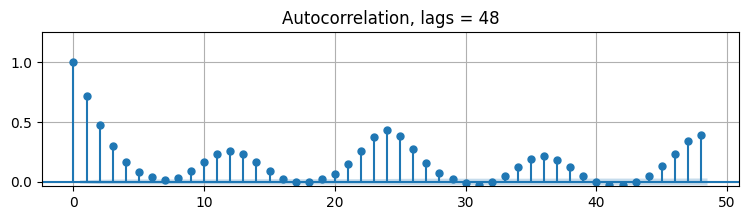

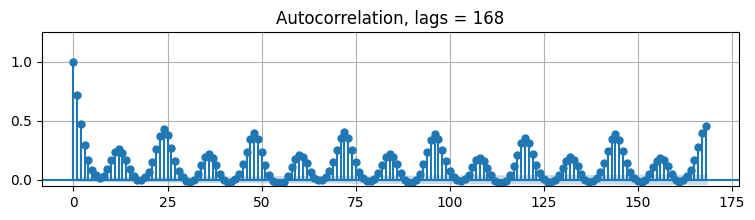

In [5]:
#Save consumption to numpy array
consumption = df_hourly["Global_active_power"].to_numpy()
consumption
#Stationarity test
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(consumption[:1000*24])
print(f"ADF Statistic: {ADF_result[0]}")
print(f"p value: {ADF_result[1]}")

fig, ax = plt.subplots(figsize=(9, 2))
plot_acf(consumption[:1000*24],lags=48,auto_ylims=True,ax=ax)
plt.title(f"Autocorrelation, lags = 48")
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(9, 2))
plot_acf(consumption[:1000*24],lags=7*24,auto_ylims=True,ax=ax)
plt.title(f"Autocorrelation, lags = 168")
plt.grid()
plt.show()


The autocorrelation function plots indicate significant relationships in daily and weekly patterns.

Here we perform the autocorrelation analysis for the explanatory variables. 

Global_reactive_power ADF Statistic: -11.117910423820225, p value: 3.5250721631869835e-20
Global_intensity ADF Statistic: -11.117910423820225, p value: 3.5250721631869835e-20
Voltage ADF Statistic: -11.117910423820225, p value: 3.5250721631869835e-20
Sub_metering_1 ADF Statistic: -11.117910423820225, p value: 3.5250721631869835e-20
Sub_metering_2 ADF Statistic: -11.117910423820225, p value: 3.5250721631869835e-20
Sub_metering_3 ADF Statistic: -11.117910423820225, p value: 3.5250721631869835e-20


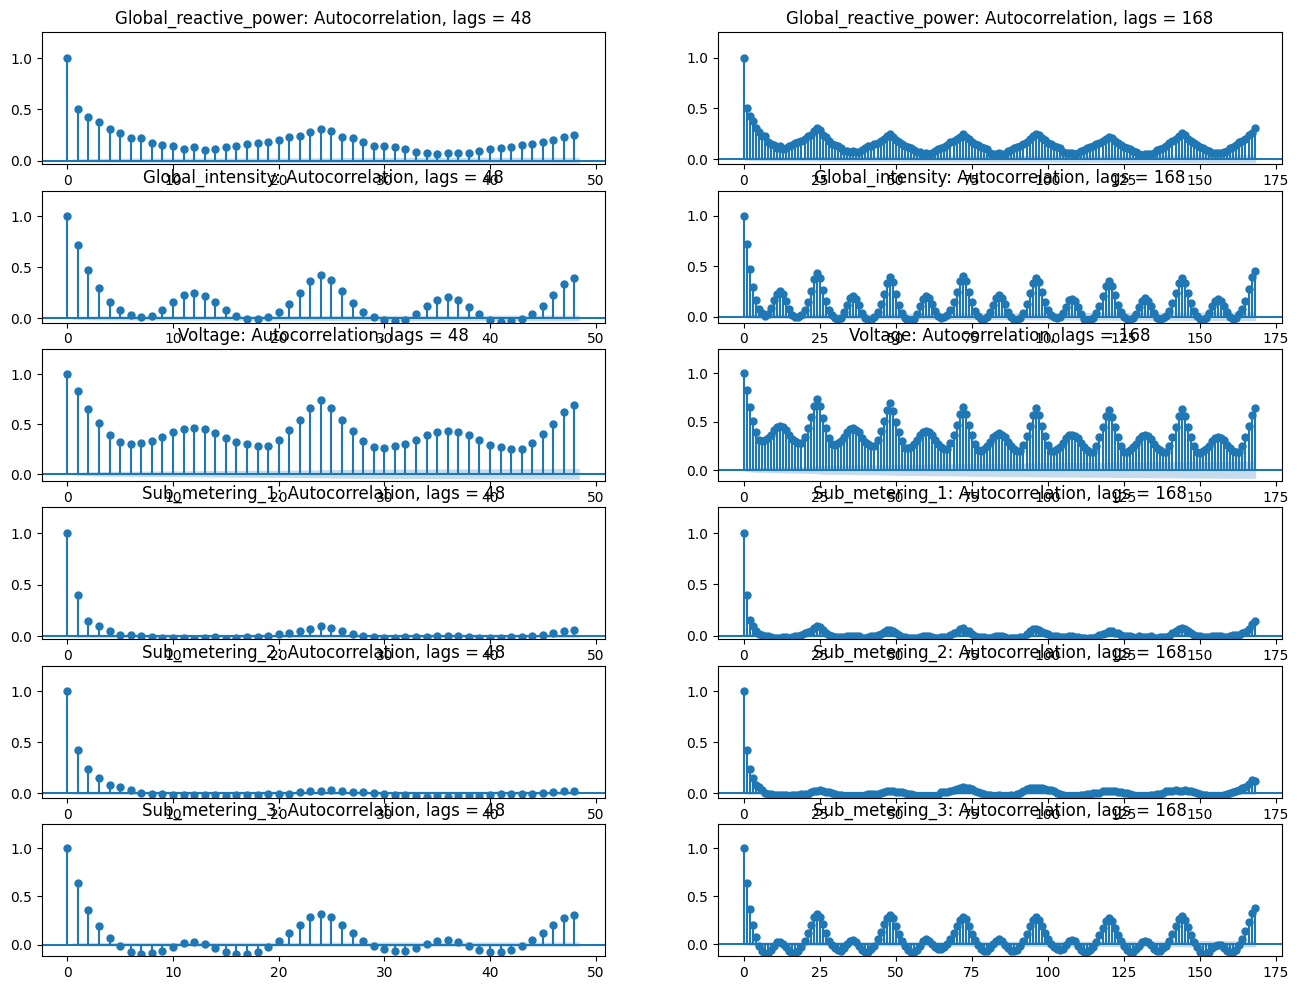

In [ ]:
fig, axes = plt.subplots(nrows=6,ncols=2,figsize=(20,12))
axes = axes.flatten()
#Columns
cols = df_hourly.columns[2:]

i = 0
for col in cols:
    values = df_hourly[col].to_numpy()
    #Stationarity test
    ADF_result = adfuller(values[:1000*24])
    print(f"{col} ADF Statistic: {np.round(ADF_result[0],2)}, p value: {np.round(ADF_result[1],2)}")
    #Autocorrelation function
    plot_acf(values[:1000*24],lags = 48,ax=axes[i], auto_ylims=True, title=f"{col}: Autocorrelation, lags = 48")
    i += 1
    plot_acf(values[:1000*24],lags = 168,ax=axes[i], auto_ylims=True, title=f"{col}: Autocorrelation, lags = 168")
    i += 1